In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

project_dir = os.path.dirname(os.path.abspath(""))
vector_dir = project_dir + '/feature_construction/output/'
save_dir = project_dir + '/dimension_reduction/output/'

save_scaled_reduced_data_dir = save_dir + 'scaled_reduced_data/'
sampled_scaled_reduced_data_path = save_dir + 'normalized_data_n_components=2_n_neighbors=200_min_dist=0.9_metric=hamming_n_jobs=-1_init=random_verbose=True_low_memory=False_sample_rate=0.1.npy'



In [2]:
import numpy as np
from tqdm import tqdm

all_scaled_reduced_data = []

file_paths = os.listdir(save_scaled_reduced_data_dir)

for file_path in tqdm(file_paths):
    data = np.load(save_scaled_reduced_data_dir + file_path)
    n, c, _ = data.shape
    data = data.reshape(n*c, -1)
    all_scaled_reduced_data.append(data)

all_scaled_reduced_data = np.concatenate(all_scaled_reduced_data)


100%|██████████| 8531/8531 [00:16<00:00, 528.66it/s] 


In [3]:
sampled_scaled_reduced_data = np.load(sampled_scaled_reduced_data_path, allow_pickle=True)
sampled_scaled_reduced_data.shape

(3906359, 2)

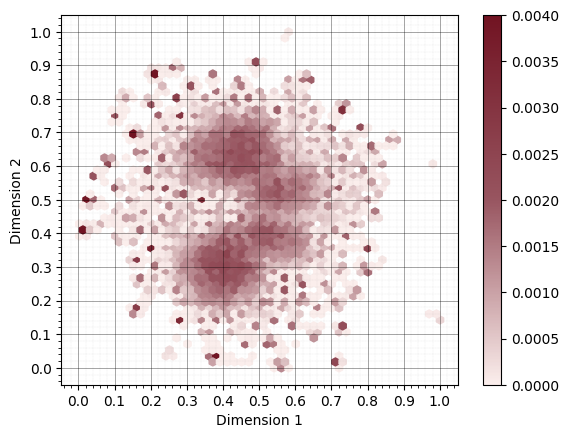

In [4]:
from matplotlib.colors import LinearSegmentedColormap
def hexbin_plt(data):
    # 热力图可视化
    # colors = ['#f5f5f5', '#6e0000']
    # colors = ['#f5f5f5', '#953932', '#711322']
    colors = ['#fbeeec', '#985560', '#711322']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    # cmap = 'hot'

    x = data[:, 0]
    y = data[:, 1]

    plt.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.5)  # 主网格线
    plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.2, alpha=0.5)  # 次网格线

    hb = plt.hexbin(x, y, gridsize=50, cmap=cmap, reduce_C_function=np.sum, mincnt=1) # 这里的50只是为了方便可视化，和采样过程无关；100的grid size可视化无法看的清晰。
    counts = hb.get_array()
    total_counts = np.sum(counts)
    probability = counts / total_counts
    # 更新颜色为概率值
    hb.set_array(probability)
    # hb.set_clim(0, probability.max())  # 设置颜色条的范围
    hb.set_clim(0, 0.004)  # 设置颜色条的范围
    cb = plt.colorbar(hb)
    # plt.colorbar(hb, label="Probability (Sample Fraction)")

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    major_ticks = np.arange(0, 1.1, 0.1)  # 主刻度
    plt.xticks(major_ticks)  # 设置x轴的主刻度
    plt.yticks(major_ticks)  # 设置y轴的主刻度
    plt.minorticks_on()  # 开启次刻度
    plt.savefig(save_dir + 'hexbin.pdf', format='pdf', bbox_inches='tight', transparent=True)

    plt.show()
    
    return probability, hb

# probability, hb = hexbin_plt(sampled_scaled_reduced_data)
probability, hb = hexbin_plt(all_scaled_reduced_data)


In [5]:
# 获取分箱后的统计值
counts = hb.get_array()
print(counts.sum())

# 获取栅格的中心坐标
offsets = hb.get_offsets()

# 获取栅格的索引
gridsize = 50
xmin, xmax = hb.axes.get_xlim()
ymin, ymax = hb.axes.get_ylim()

# 创建一个全零数组来存储所有栅格的值
full_counts = np.zeros((gridsize, gridsize))

# 填充非空栅格的值
for i, (x, y) in enumerate(offsets):
    ix = int((x - xmin) / (xmax - xmin) * gridsize)
    iy = int((y - ymin) / (ymax - ymin) * gridsize)
    full_counts[iy, ix] = counts[i]

# 现在 full_counts 包含了所有栅格的值，包括空栅格（值为0）
print(full_counts)

1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
